In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Understanding the dataset

In [2]:
df = pd.read_csv('train.csv')
df.info()
df = df.drop(columns=['Loan_ID'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking for NULL values in the dataset

In [4]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing LoanAmount, Credit_History and Self_Employed with their Mean, Median and Mode respecitvely and dropping the the rest of the rows with missing values 

In [5]:
# df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
# df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())
# df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode())
# df.dropna(inplace=True)
# df.isnull().sum()

df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

df1 = df.loc[:,['LoanAmount','Loan_Amount_Term']]

from sklearn.ensemble import RandomForestRegressor

imp = IterativeImputer(RandomForestRegressor(), max_iter=1000, random_state=0)
df1 = pd.DataFrame(imp.fit_transform(df1), columns=df1.columns)

df['LoanAmount'] = df1['LoanAmount']
df['Loan_Amount_Term'] = df1['Loan_Amount_Term']

df.isnull().sum()

c:\Users\Ritvik Wuyyuru\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Visualising how Loan_Status varies with each categorical attribute

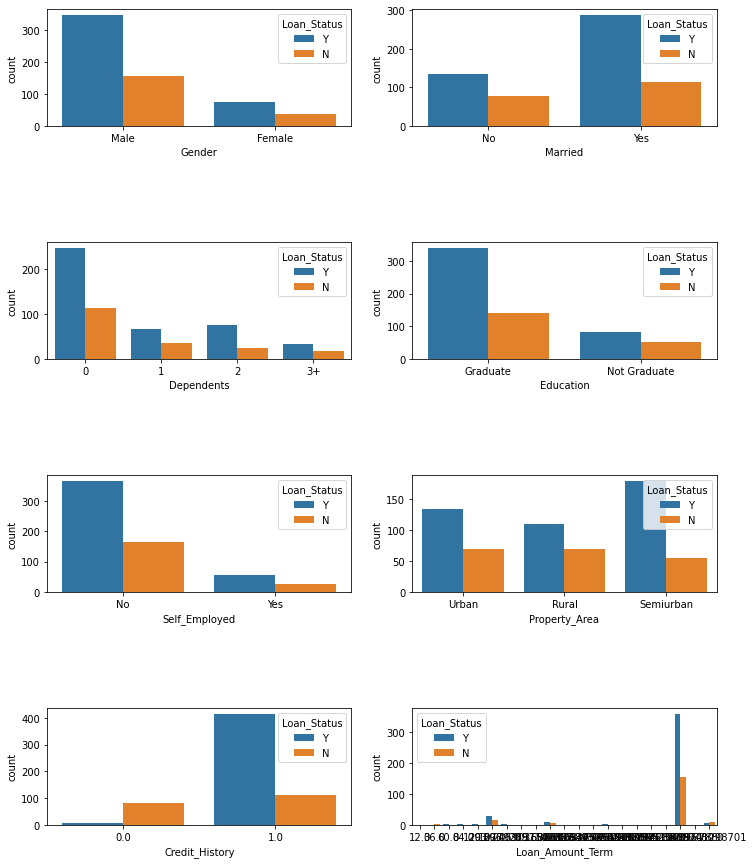

In [6]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

Loan Approval Status: About 2/3rd of applicants have been granted loan.  
Sex: There are more Men than Women (approx. 3x)  
Marital Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.  
Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.  
Education: About 5/6th of the population is Graduate and graduates have higher proportion of loan approval.  
Employment: 5/6th of population is not self employed.  
Property Area: More applicants from Semi-urban and also likely to be granted loans.  
Applicant with credit history are far more likely to be accepted.  
Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).  

Analyzing the numerical attributes

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.394879
std        6109.041673        2926.248369   84.042807
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  128.500000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


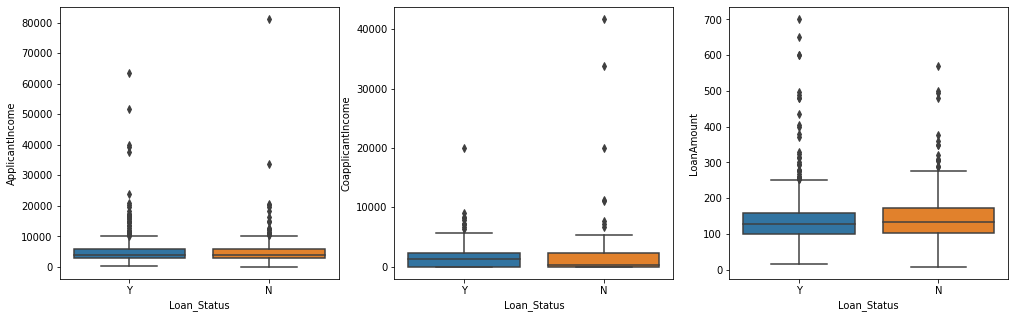

In [7]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

There is no significant relation between the numerical columns and Loan_Status

Encoding all the categorical columns

In [8]:
df_encoded = pd.get_dummies(df,drop_first=True)

Checking for correlation between the attributes using a Correlogram

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

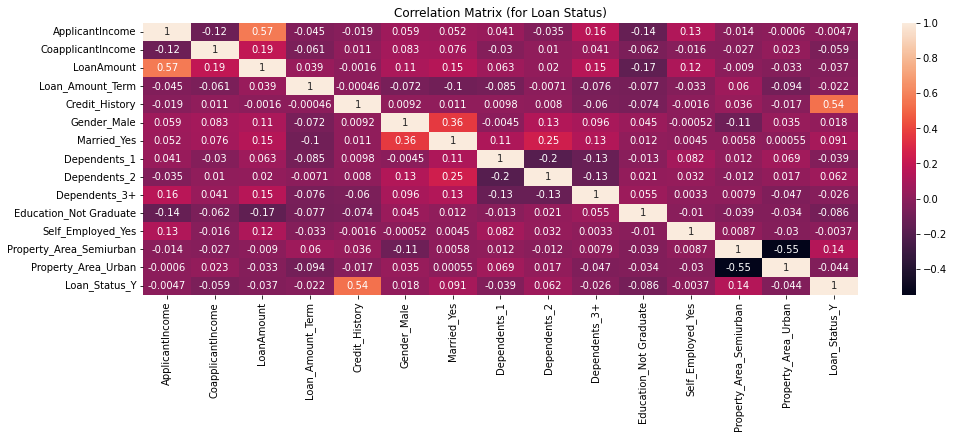

In [9]:
plt.figure(figsize=(16,5))
sns.heatmap(df_encoded.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')